# Load and Preprocess Data
Load the original HeartRate.csv file using pandas, handle timestamp conversions and clean any anomalies in the data.

In [1]:
import pandas as pd

# 加载原始心率数据
df = pd.read_csv('HeartRate.csv')

# 将时间戳转换为日期时间格式
df['time'] = pd.to_datetime(df['time'], unit='ns')

# 清理数据中的异常值
df = df[df['bpm'] > 0]

# 显示前几行数据以检查
df.head()

,time,seconds_elapsed,bpm
0,2024-12-11 12:48:06.998134500,2.423135,89.0
1,2024-12-11 12:48:11.998134500,7.423135,90.0
2,2024-12-11 12:48:16.998134500,12.423135,94.0
3,2024-12-11 12:48:21.998134500,17.423135,93.0
4,2024-12-11 12:48:27.998134500,23.423135,92.0


# Analyze Original Pattern
Analyze the original heart rate patterns, identify peaks, troughs and overall trends using signal processing techniques.

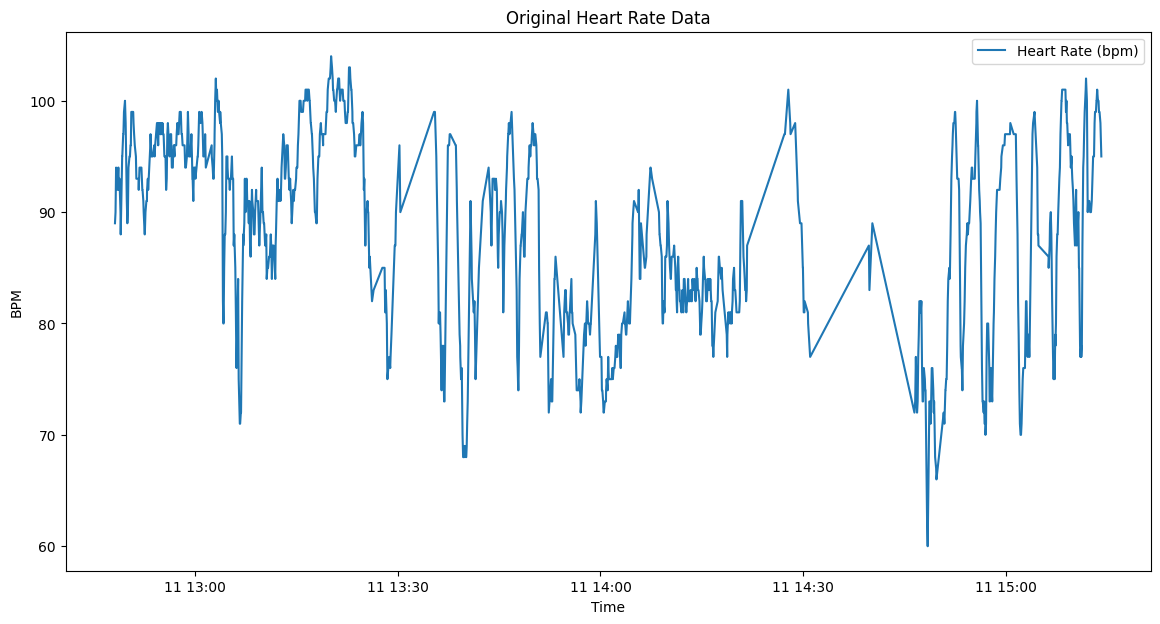

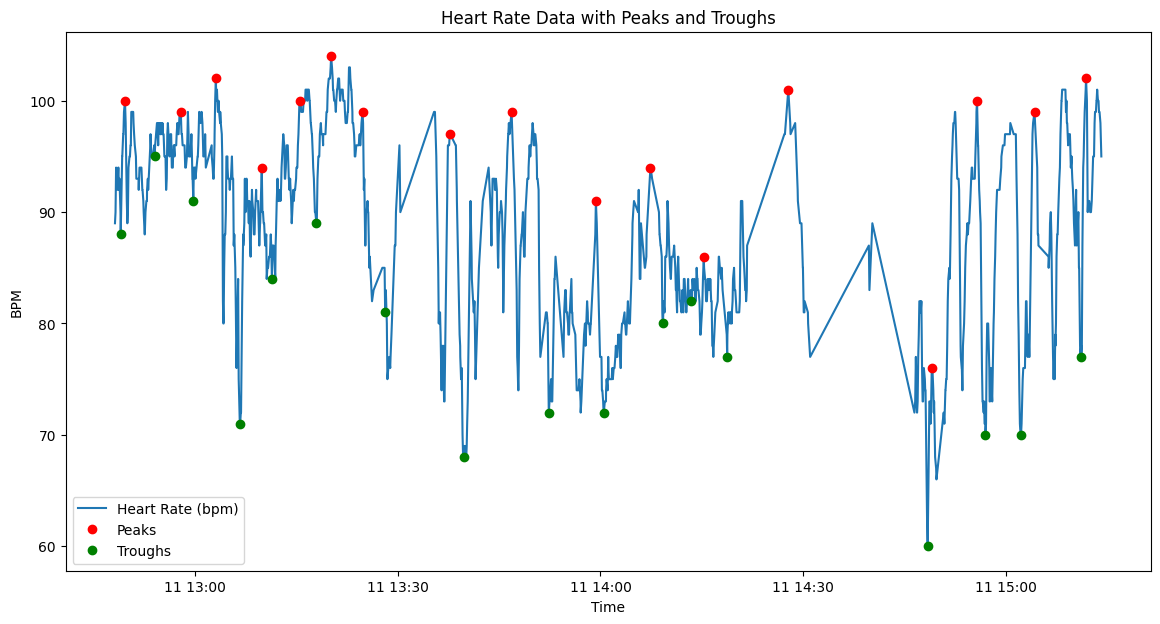

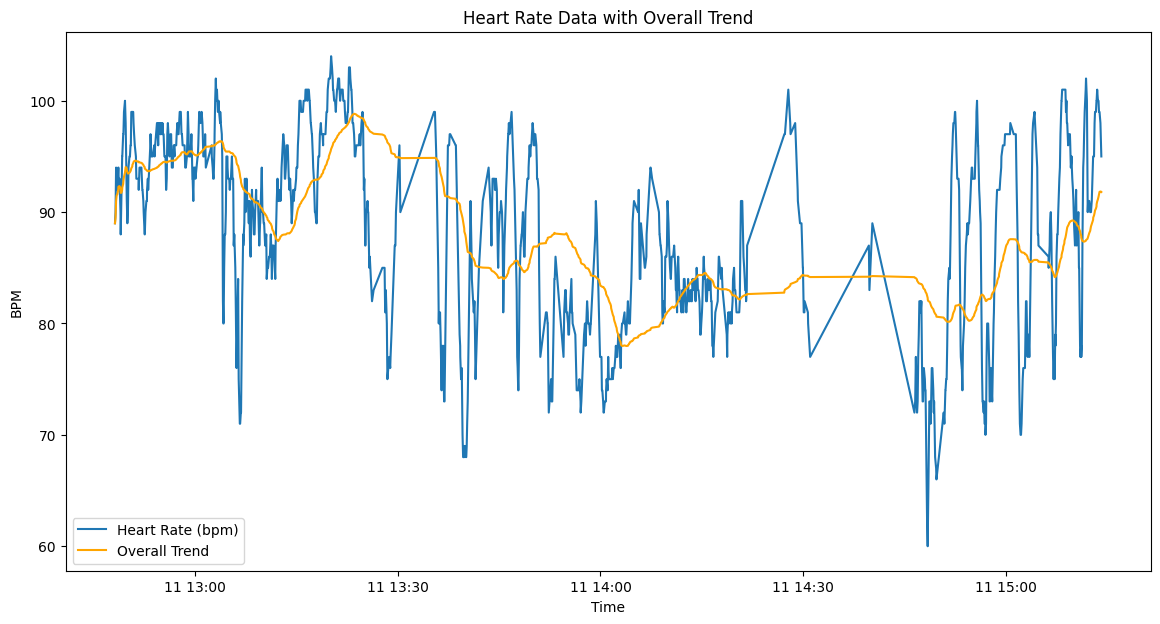

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 绘制原始心率数据
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['bpm'], label='Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Original Heart Rate Data')
plt.legend()
plt.show()

# 使用信号处理技术识别峰值和谷值
peaks, _ = find_peaks(df['bpm'], distance=50)
troughs, _ = find_peaks(-df['bpm'], distance=50)

# 绘制心率数据及其峰值和谷值
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['bpm'], label='Heart Rate (bpm)')
plt.plot(df['time'].iloc[peaks], df['bpm'].iloc[peaks], 'ro', label='Peaks')
plt.plot(df['time'].iloc[troughs], df['bpm'].iloc[troughs], 'go', label='Troughs')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Heart Rate Data with Peaks and Troughs')
plt.legend()
plt.show()

# 计算总体趋势
df['rolling_mean'] = df['bpm'].rolling(window=100, min_periods=1).mean()

# 绘制心率数据及其总体趋势
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['bpm'], label='Heart Rate (bpm)')
plt.plot(df['time'], df['rolling_mean'], label='Overall Trend', color='orange')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Heart Rate Data with Overall Trend')
plt.legend()
plt.show()

# Generate Inverse Pattern
Create segments with inverse patterns by flipping peaks to troughs while maintaining realistic heart rate ranges (60-120 bpm).

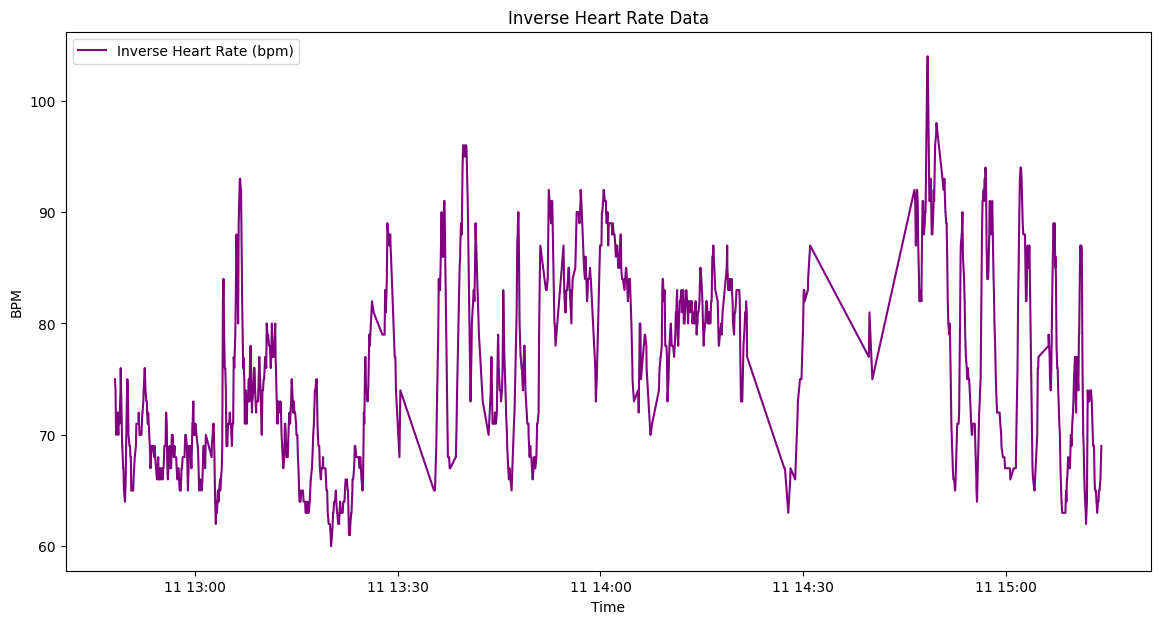

In [3]:
import numpy as np

# 生成与原始数据趋势相反的心率数据
inverse_bpm = df['bpm'].max() + df['bpm'].min() - df['bpm']

# 保持心率数据在合理范围内（60-120 bpm）
inverse_bpm = np.clip(inverse_bpm, 60, 120)

# 创建新的DataFrame存储反向心率数据
df_inverse = df.copy()
df_inverse['bpm'] = inverse_bpm

# 将反向心率数据保存到新的CSV文件中
df_inverse.to_csv('HeartRate2.csv', index=False)

# 绘制反向心率数据
plt.figure(figsize=(14, 7))
plt.plot(df_inverse['time'], df_inverse['bpm'], label='Inverse Heart Rate (bpm)', color='purple')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Inverse Heart Rate Data')
plt.legend()
plt.show()

# Add Similar Segments
Generate segments that follow similar patterns to the original data to create a mixed dataset.

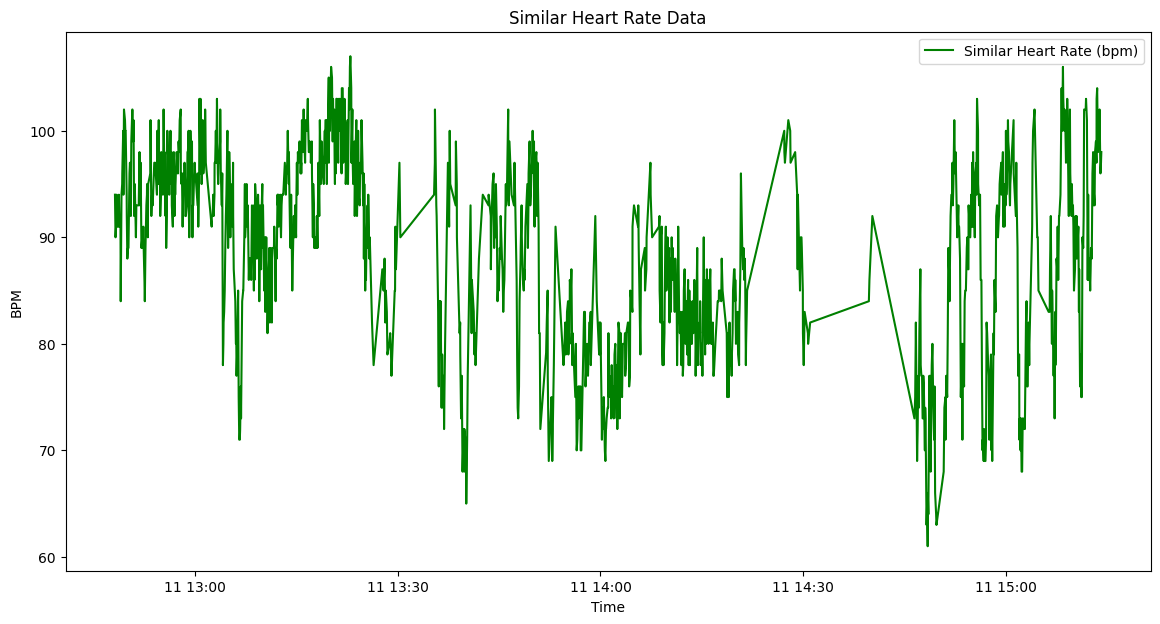

In [4]:
import random

# 生成与原始数据部分相似的心率数据
similar_bpm = df['bpm'].copy()

# 在原始心率数据的基础上添加随机波动
for i in range(len(similar_bpm)):
    if i % 2 == 0:
        similar_bpm[i] += random.randint(-5, 5)
    else:
        similar_bpm[i] += random.randint(-3, 3)

# 保持心率数据在合理范围内（60-120 bpm）
similar_bpm = np.clip(similar_bpm, 60, 120)

# 创建新的DataFrame存储相似心率数据
df_similar = df.copy()
df_similar['bpm'] = similar_bpm

# 将相似心率数据保存到新的CSV文件中
df_similar.to_csv('HeartRate2.csv', mode='a', header=False, index=False)

# 绘制相似心率数据
plt.figure(figsize=(14, 7))
plt.plot(df_similar['time'], df_similar['bpm'], label='Similar Heart Rate (bpm)', color='green')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Similar Heart Rate Data')
plt.legend()
plt.show()

# Save New Dataset
Save the generated heart rate pattern as HeartRate2.csv with matching columns (time, seconds_elapsed, bpm).

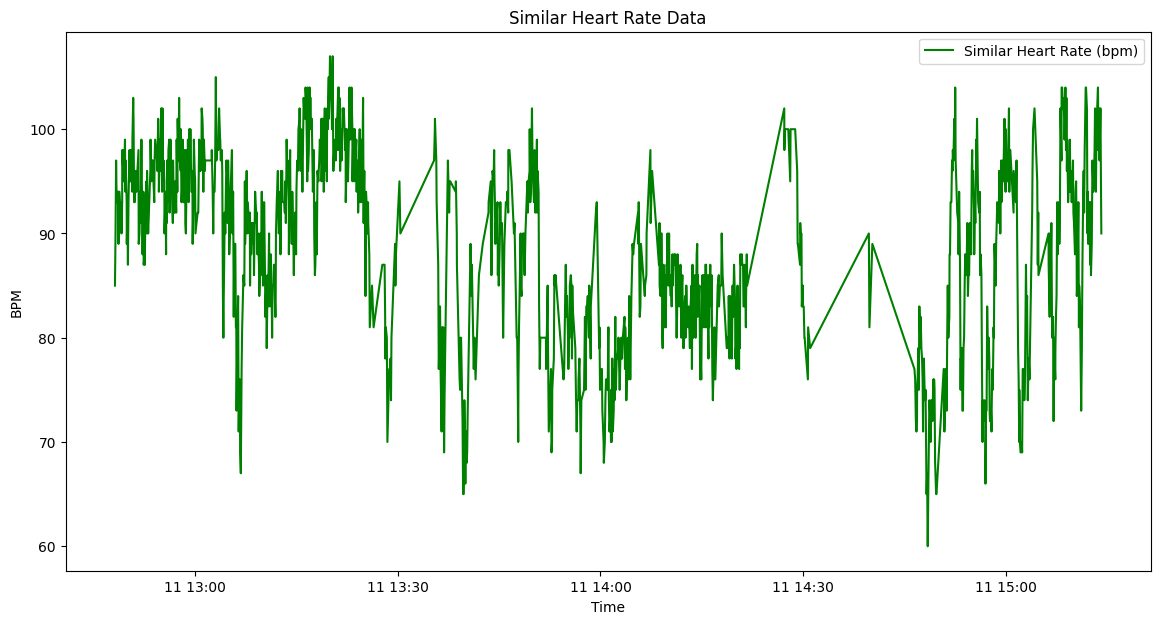

In [5]:
import random

# 生成与原始数据部分相似的心率数据
similar_bpm = df['bpm'].copy()

# 在原始心率数据的基础上添加随机波动
for i in range(len(similar_bpm)):
    if i % 2 == 0:
        similar_bpm[i] += random.randint(-5, 5)
    else:
        similar_bpm[i] += random.randint(-3, 3)

# 保持心率数据在合理范围内（60-120 bpm）
similar_bpm = np.clip(similar_bpm, 60, 120)

# 创建新的DataFrame存储相似心率数据
df_similar = df.copy()
df_similar['bpm'] = similar_bpm

# 将相似心率数据保存到新的CSV文件中
df_similar.to_csv('HeartRate2.csv', mode='a', header=False, index=False)

# 绘制相似心率数据
plt.figure(figsize=(14, 7))
plt.plot(df_similar['time'], df_similar['bpm'], label='Similar Heart Rate (bpm)', color='green')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Similar Heart Rate Data')
plt.legend()
plt.show()

# Visualize Comparison
Plot the original and generated patterns side by side to visualize the inverse and similar segments.

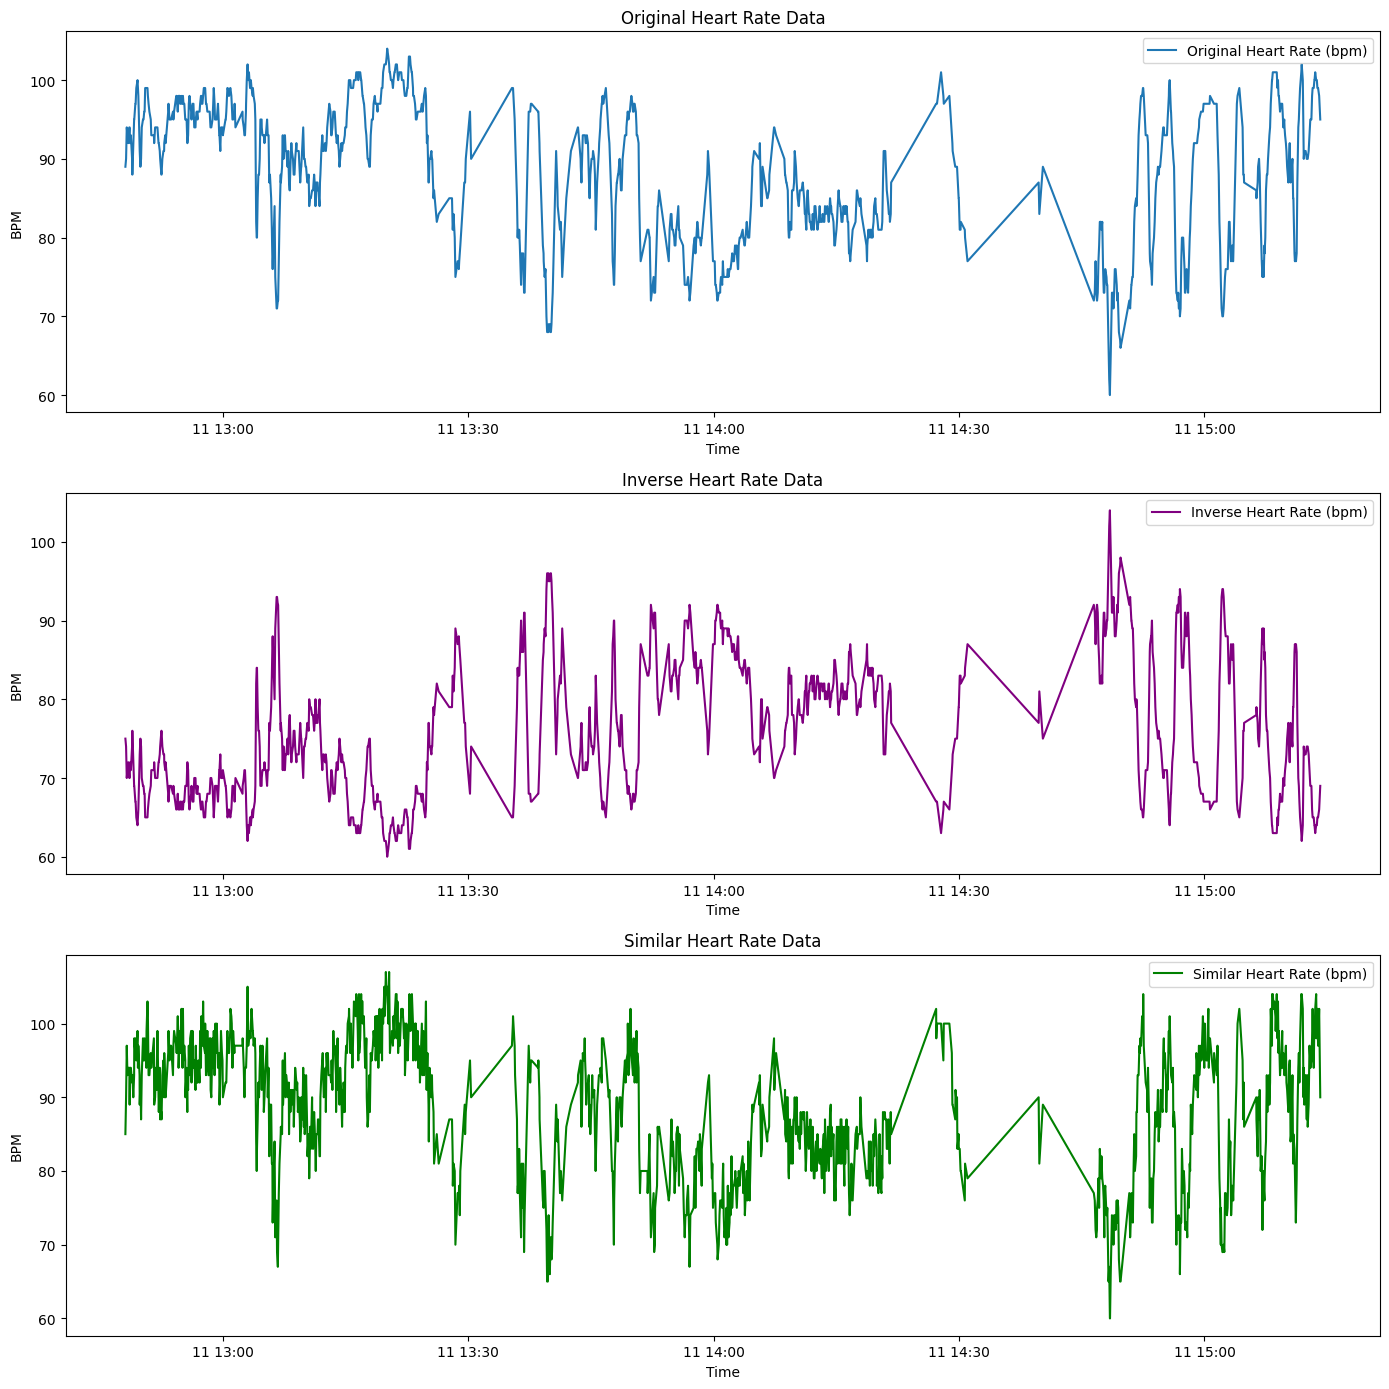

In [6]:
# 绘制原始心率数据和生成的反向/相似心率数据以进行比较
plt.figure(figsize=(14, 14))

# 绘制原始心率数据
plt.subplot(3, 1, 1)
plt.plot(df['time'], df['bpm'], label='Original Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Original Heart Rate Data')
plt.legend()

# 绘制反向心率数据
plt.subplot(3, 1, 2)
plt.plot(df_inverse['time'], df_inverse['bpm'], label='Inverse Heart Rate (bpm)', color='purple')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Inverse Heart Rate Data')
plt.legend()

# 绘制相似心率数据
plt.subplot(3, 1, 3)
plt.plot(df_similar['time'], df_similar['bpm'], label='Similar Heart Rate (bpm)', color='green')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Similar Heart Rate Data')
plt.legend()

plt.tight_layout()
plt.show()